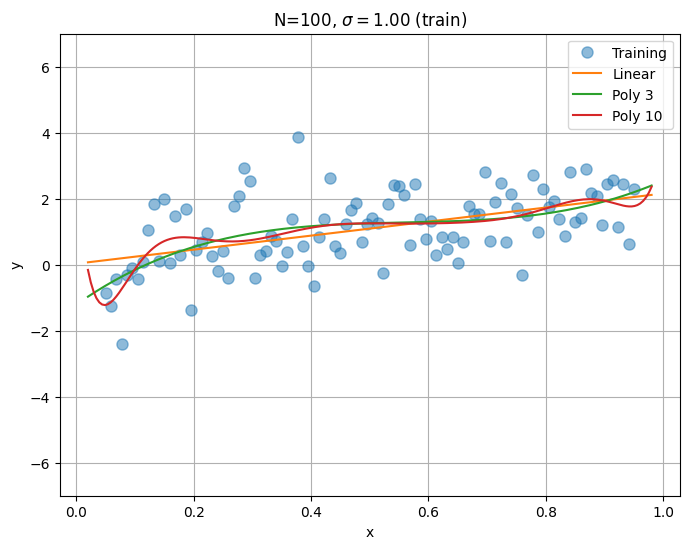

In [47]:
import warnings
warnings.filterwarnings('ignore')

#This is Python Notebook to walk through polynomial regression examples
#We will use this to think about regression
import numpy as np
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt, rcParams
fig = plt.figure(figsize=(8, 6))

# The Training Data
N_train=100
sigma_train=1;

# Train on integers
x=np.linspace(0.05,0.95,N_train)
# Draw Gaussian random noise
s = sigma_train*np.random.randn(N_train)

#linear
y=2*x+s

# Tenth Order
#y=2*x-10*x**5+15*x**10+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

# Linear Regression : create linear regression object
clf = linear_model.LinearRegression()

# Train the model using the training set
# Note: sklearn requires a design matrix of shape (N_train, N_features). Thus we reshape x to (N_train, 1):
clf.fit(x[:, np.newaxis], y)

# Use fitted linear model to predict the y value:
xplot=np.linspace(0.02,0.98,200) # grid of points, some are in the training set, some are not
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

# Polynomial Regression
poly3 = PolynomialFeatures(degree=3)
# Construct polynomial features
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)


Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

# Fifth order polynomial in case you want to try it out
#poly5 = PolynomialFeatures(degree=5)
#X = poly5.fit_transform(x[:,np.newaxis])
#clf5 = linear_model.LinearRegression()
#clf5.fit(X,y)

#Xplot=poly5.fit_transform(xplot[:,np.newaxis])
#plt.plot(xplot, clf5.predict(Xplot), 'r--',linewidth=1)

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")

# Linear Filename
filename_train="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Tenth Order Filename
#filename_train="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Saving figure and showing results
plt.savefig(filename_train)
plt.grid()
plt.show()

In [48]:
# Generate Test Data
%matplotlib inline
# Number of test data
N_test=20
sigma_test=sigma_train

# Generate random grid points (x) in the interval [0, max_x]:
# Note some points will be drawn outside the training interval
max_x=1.2
x_test=max_x*np.random.random(N_test)

# Draw random Gaussian noise
s_test = sigma_test*np.random.randn(N_test)

# Linear
y_test=2*x_test+s_test
# Tenth order
#y_test=2*x_test-10*x_test**5+15*x_test**10+s_test


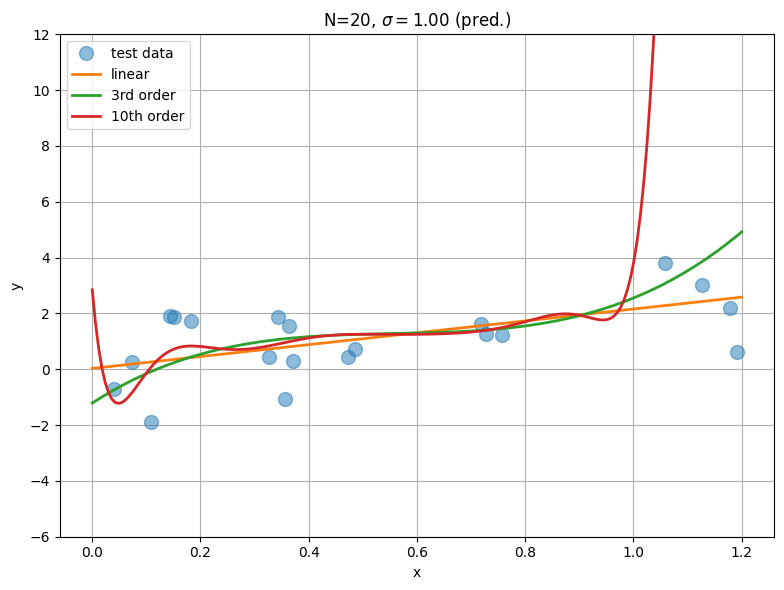

In [49]:
# Make design matrices for prediction
x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

############## PLOTTING RESULTS ##########

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))

# Linear Filename
filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

# Tenth Order Filename
#filename_test=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

# Exercises
PS: Please write all new codes below this cell. Each exercise should be in a new cell and should be marked clearly as markdown text. Each part of the exercise should be marked in comments.


## Exercise 1: Fitting vs. predicting when the data is in the model class


We start by considering the case:
$$
f(x)=2x.
$$
Then the data is clearly generated by a model that is contained within all three model classes we are using to make predictions (linear models, third order polynomials, and tenth order polynomials).


Run the code for the following cases:
<ul>
<li> For $f(x)=2x$, $N_{\mathrm{train}}=10$ and $\sigma=0$ (noiseless case), train the three classes of models (linear, third-order polynomial, and tenth order polynomial) for a training set when $x_i  \in [0,1]$. Make graphs comparing fits for different order of polynomials. Which model fits the data the best?
<li> Do you think that the data that has the least error on the training set will also make the best predictions? Why or why not? Can you try to discuss and formalize your intuition? What can go right and what can go wrong?
<li>Check your answer by seeing how well your fits predict newly generated test data (including on data outside the range you fit on, for example $x \in [0,1.2]$) using the code below. How well do you do on points in the range of $x$ where you trained the model? How about points outside the original training data set?
<li>Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=10$, and $\sigma=1$. What changes?
<li>Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=1000$, and $\sigma=1$. What changes?
<li>Repeat the exercises above for $\sigma=0.1$ without changing any other parameters or functions. What changes?
<li> Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.
</ul>


## Exercise 2: Fitting vs. predicting when the data is not in the model class
Thus far, we have considered the case where the data is generated using a model contained in the model class. Now consider  $f(x)=2x-10x^5+15x^{10}$. *Notice that the for linear and third-order polynomial the true model $f(x)$ is not contained in model class $g_\alpha(x)$* .

<ul>
<li> Repeat the exercises above fitting and predicting for $f(x)=2x-10x^5+15x^{10}$ for $N_{\mathrm{train}}=10,1000$ and $\sigma=0,1$. Record your observations.
<li> Do better fits lead to better predictions?
<li> What is the relationship between the true model for generating the data and the model class that has the most predictive power? How is this related to the model complexity? How does this depend on the number of data points $N_{\mathrm{train}}$ and $\sigma$?
<li> Summarize what you think you learned about the relationship of knowing the true model class and predictive power.
</ul>


## Exercise 3: Compute the cost function
Note the formula for cost function in the paragraph above. $y_j$ is the actual value in test dataset, $N_{test}$ is the size of test dataset, and $y_{pred}$ is the y value predicted by a given model.
<ul>
    <li> Using the formula for cost function defined above, find the cost function for linear regression model (degree 1).
    <li> Repeat the same for polynomial regression model of degree 3.
</ul>


## Exercise 4: Build a polynomial regression model from scratch
<ul>
    <li> Transform the original dataset x into X_new with 2 new features corresponding to $x^2$ and $x^3$.
    <li> Define the model $f(x,\theta)$ and cost function C.
    <li> Use any available algorithm to iteratively tune $\theta_0,\theta_1,\theta_2,\theta_3$ so that the cost function is minimized (minimum five iterations).
    <li> Display the final model by substituting the values of $\theta$.
</ul>

# My(Aekampreet Singh Dhir's)[2301PH19] Answers

# Exercise 1:

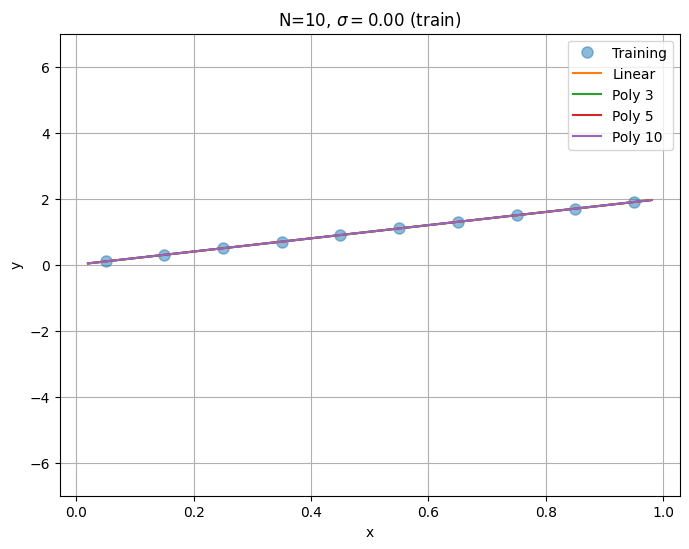

In [50]:
# Part a

import numpy as np
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt, rcParams
fig = plt.figure(figsize=(8, 6))

N_train=10
sigma_train=0;

x=np.linspace(0.05,0.95,N_train)
s=sigma_train*np.random.randn(N_train)

y=2*x+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

clf = linear_model.LinearRegression()

clf.fit(x[:, np.newaxis], y)

xplot=np.linspace(0.02,0.98,200)
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)

Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

# Fifth order polynomial in case you want to try it out
poly5 = PolynomialFeatures(degree=5)
X = poly5.fit_transform(x[:,np.newaxis])
clf5 = linear_model.LinearRegression()
clf5.fit(X,y)

Xplot=poly5.fit_transform(xplot[:,np.newaxis])
plt.plot(xplot, clf5.predict(Xplot), label='Poly 5')

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")

filename_train_1="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)
filename_train_2="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)


plt.savefig(filename_train_1)
plt.savefig(filename_train_2)
plt.grid()
plt.show()

Part b

No, the model with the least error on the training set will **not necessarily** make the best predictions on new, unseen data. In fact, it often makes worse predictions.

This is one of the most fundamental challenges in machine learning. A model can become so complex that it starts to "memorize" the training data, including its random noise, instead of learning the true underlying pattern. This is called **overfitting**.

### My Intuition: The Bias-Variance Tradeoff

We can formalize this intuition with two key concepts: **bias** and **variance**. The total error of a model on unseen data is a combination of these two, plus some irreducible noise.

* **Bias** is the error from making overly simple assumptions. A model with high bias pays little attention to the training data and misses the underlying patterns. This leads to **underfitting**.
    * *Example*: Trying to fit a complex curve with a straight line. The line has high bias because it's fundamentally wrong for the data's shape.

* **Variance** is the error from being overly sensitive to the training data. A model with high variance pays *too much* attention to the training data, fitting even the random noise. This leads to **overfitting**.
    * *Example*: Using a 10th-degree polynomial to fit data that is almost linear. The model will wiggle and bend to hit every single noisy data point perfectly.

The **Bias-Variance Tradeoff**  describes the relationship: as you increase a model's complexity, its bias decreases (it fits the training data better), but its variance increases (it becomes more likely to overfit the noise). The best model is one that finds the sweet spot with low bias and low variance.

***

### What Can Go Right vs. What Can Go Wrong

#### What Can Go Right (A Good Fit)
This happens when your model's complexity is a good match for the underlying pattern in the data.

* **Scenario**: You use a **linear model** to fit the $f(x)=2x$ data when there's a bit of noise ($\sigma=1$).
* **Result**: The model will not fit the training data perfectly because of the noise, so its training error won't be zero. However, it correctly learns the simple, linear trend. When you give it new test data, its predictions will be very accurate because it ignored the noise and captured the true pattern.

#### What Can Go Wrong (Overfitting)
This happens when your model is too complex for the data and the amount of training data is limited.

* **Scenario**: You use a **10th-degree polynomial model** to fit the same noisy, linear data from just 10 training points.
* **Result**: The high-degree polynomial has enough flexibility to wiggle through every single noisy data point, achieving a training error that is very close to zero. It will look like a perfect fit. However, it has "memorized" the noise. When you introduce new test data, the model's predictions will be wild and highly inaccurate, because the noise in the new data is different. The model has high variance and fails to generalize.

In [51]:
# Part c

%matplotlib inline

N_test=10
sigma_test=sigma_train

max_x=1.2
x_test = max_x*np.random.random(N_test)

s_test = sigma_test*np.random.randn(N_test)

y_test=2*x_test+s_test

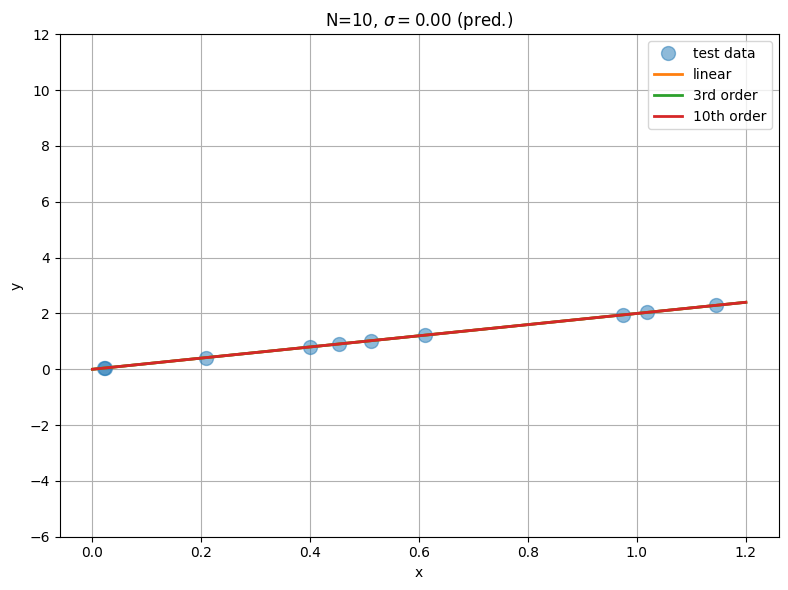

In [52]:

x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))

filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

filename_test_10=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

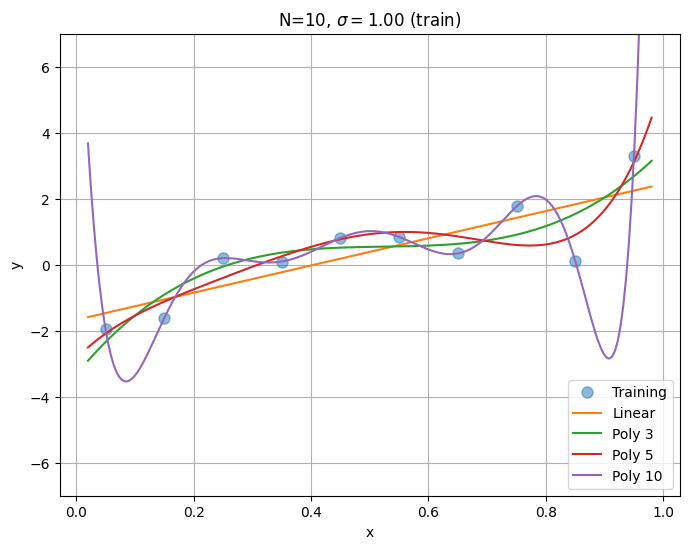

In [53]:
# Part d

%matplotlib inline

fig = plt.figure(figsize=(8, 6))

N_train=10
sigma_train=1;

x=np.linspace(0.05,0.95,N_train)
s=sigma_train*np.random.randn(N_train)

y=2*x+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

clf = linear_model.LinearRegression()

clf.fit(x[:, np.newaxis], y)

xplot=np.linspace(0.02,0.98,200)
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)

Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

# Fifth order polynomial in case you want to try it out
poly5 = PolynomialFeatures(degree=5)
X = poly5.fit_transform(x[:,np.newaxis])
clf5 = linear_model.LinearRegression()
clf5.fit(X,y)

Xplot=poly5.fit_transform(xplot[:,np.newaxis])
plt.plot(xplot, clf5.predict(Xplot), label='Poly 5')

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")

filename_train_1="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)
filename_train_2="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)


plt.savefig(filename_train_1)
plt.savefig(filename_train_2)
plt.grid()
plt.show()

In [54]:
%matplotlib inline

N_test=10
sigma_test=sigma_train

max_x=1.2
x_test = max_x*np.random.random(N_test)

s_test = sigma_test*np.random.randn(N_test)

y_test=2*x_test+s_test

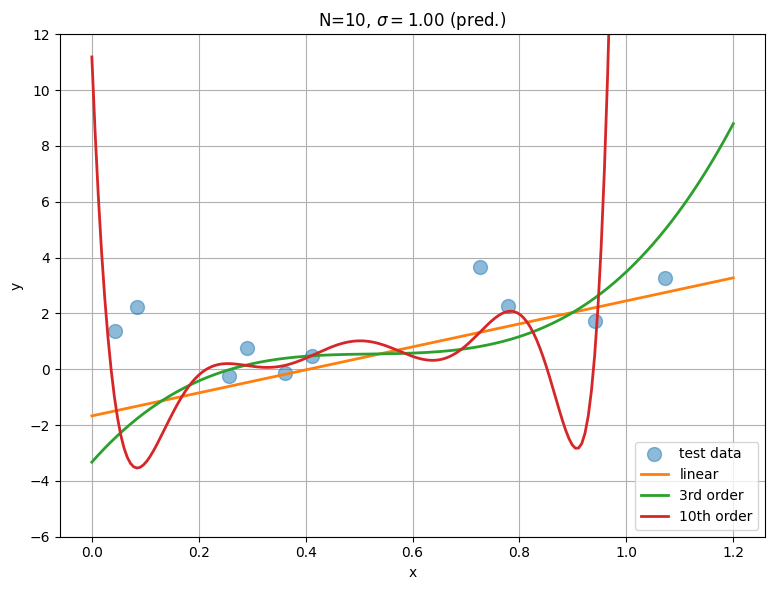

In [55]:

x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))

filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

filename_test_10=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

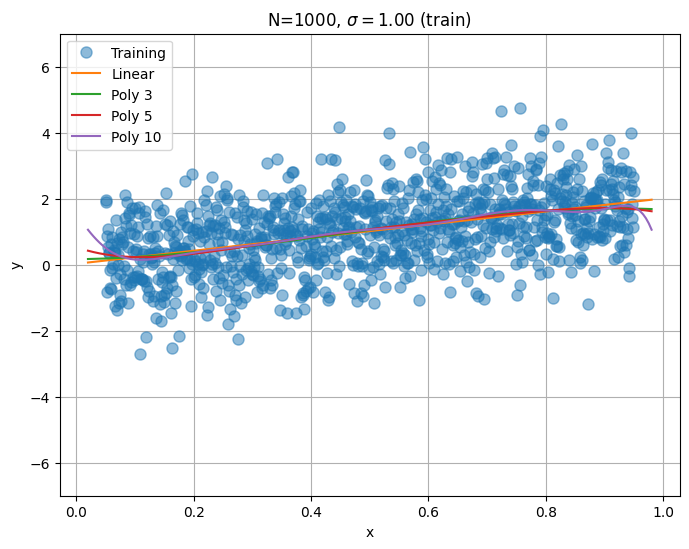

In [56]:
# Part e

%matplotlib inline

fig = plt.figure(figsize=(8, 6))

N_train=1000
sigma_train=1;

x=np.linspace(0.05,0.95,N_train)
s=sigma_train*np.random.randn(N_train)

y=2*x+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

clf = linear_model.LinearRegression()

clf.fit(x[:, np.newaxis], y)

xplot=np.linspace(0.02,0.98,200)
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)

Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

poly5 = PolynomialFeatures(degree=5)
X = poly5.fit_transform(x[:,np.newaxis])
clf5 = linear_model.LinearRegression()
clf5.fit(X,y)

Xplot=poly5.fit_transform(xplot[:,np.newaxis])
plt.plot(xplot, clf5.predict(Xplot), label='Poly 5')

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")

filename_train_1="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)
filename_train_2="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)


plt.savefig(filename_train_1)
plt.savefig(filename_train_2)
plt.grid()
plt.show()

In [57]:
%matplotlib inline

N_test=1000
sigma_test=sigma_train

max_x=1.2
x_test = max_x*np.random.random(N_test)

s_test = sigma_test*np.random.randn(N_test)

y_test=2*x_test+s_test

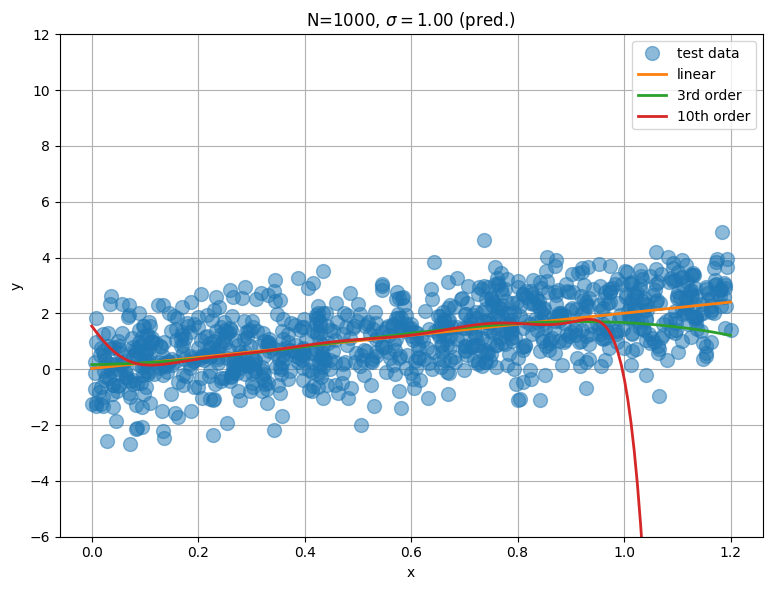

In [58]:

x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))

filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

filename_test_10=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

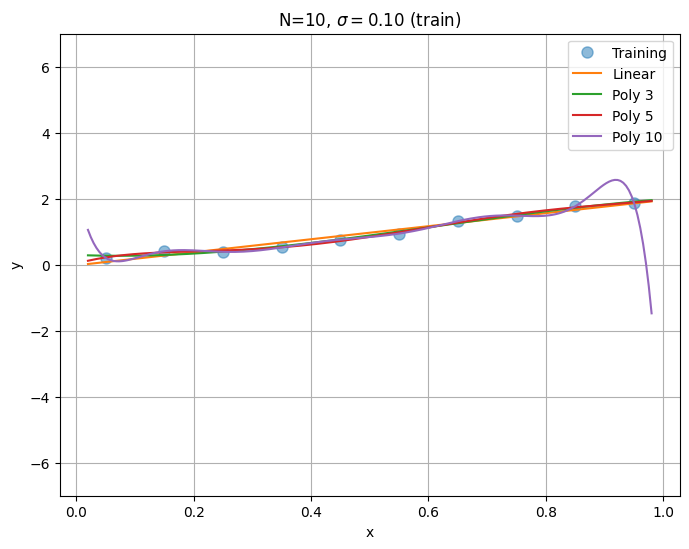

In [59]:
# Part f

%matplotlib inline

fig = plt.figure(figsize=(8, 6))

N_train=10
sigma_train=0.1;

x=np.linspace(0.05,0.95,N_train)
s=sigma_train*np.random.randn(N_train)

y=2*x+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

clf = linear_model.LinearRegression()

clf.fit(x[:, np.newaxis], y)

xplot=np.linspace(0.02,0.98,200)
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)

Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

poly5 = PolynomialFeatures(degree=5)
X = poly5.fit_transform(x[:,np.newaxis])
clf5 = linear_model.LinearRegression()
clf5.fit(X,y)

Xplot=poly5.fit_transform(xplot[:,np.newaxis])
plt.plot(xplot, clf5.predict(Xplot), label='Poly 5')

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")

filename_train_1="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)
filename_train_2="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)


plt.savefig(filename_train_1)
plt.savefig(filename_train_2)
plt.grid()
plt.show()

In [60]:
%matplotlib inline

N_test=10
sigma_test=sigma_train

max_x=1.2
x_test = max_x*np.random.random(N_test)

s_test = sigma_test*np.random.randn(N_test)

y_test=2*x_test+s_test

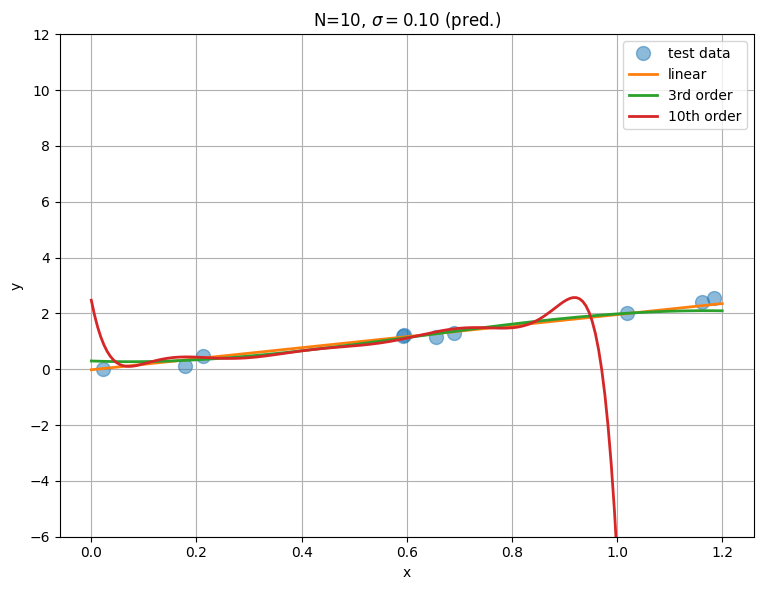

In [61]:

x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))

filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

filename_test_10=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

# Part g

# When the Model Knows the Truth

I’ll start with a case where the true function,

$$ f(x) = 2x $$

is simple and linear. This function is contained within all three model classes I’ll be testing: **linear**, **3rd-order polynomial**, and **10th-order polynomial**.

---

## Part A: The Noiseless Case ($N=10, \; \sigma=0$)

First, I trained the three models on a small, perfect dataset with just 10 data points and zero noise.

**Observation:**
The plot shows that all three models—linear, 3rd-order, and 10th-order—fit the training data perfectly. Their lines lie directly on top of one another, passing through every point. In this ideal, noiseless scenario, there is no difference in their performance on the data they were trained on.

---

## Part B: The Big Question – Does a Perfect Fit Mean Perfect Predictions?

This leads to a crucial question in machine learning:

**Does the best fit on training data guarantee the best predictions on new data?**

The short answer: **not necessarily**. The reason is a phenomenon called **overfitting**.

The goal is to find a model with **low bias and low variance** that generalizes well.

---

## Part C: The Prediction Test

Next, I tested the trained models on new, unseen data, including points outside the training range ($x$ up to 1.2).

**Observation:**

- **Inside training range (0 to 1.0):** All models predict perfectly.
- **Outside training range (1.0 to 1.2):**
  - Linear and 3rd-order models still predict correctly.
  - The 10th-order model diverges wildly. It memorized the training points but failed to learn the simple rule

    $$ f(x) = 2x $$

    making it terrible for extrapolation.

---

## Parts D, E, & F: Adding Noise and More Data

Now, I explored more realistic scenarios by adding noise ($\sigma = 1$) and increasing dataset size ($N = 1000$).

**Observations:**

- **Small, noisy data ($N=10, \; \sigma=1$):**
  - The 10th-order polynomial shows classic overfitting—its curve wiggles around the noise.
  - While it fits the training data, it predicts poorly on new data.
  - The linear model, which ignores noise and captures the trend, performs better.

- **Large, noisy data ($N=1000, \; \sigma=1$):**
  - With lots of data, even the 10th-order model performs well.
  - The abundance of data prevents it from overfitting the noise.

- **Small, low-noise data ($N=10, \; \sigma=0.1$):**
  - Overfitting is less severe, but the linear model still proves to be more reliable.

---

## Part G: Summary of Lessons Learned

From these experiments, I learned several key lessons about model complexity, training fit, and predictive performance:

1. **More complexity improves training fit.**
   A 10th-order polynomial can bend through every point, unlike a simple line.

2. **A perfect fit is not the goal.**
   On small, noisy data, complex models overfit—learning noise instead of patterns.

3. **Simpler models often generalize better.**
   The linear model was the most reliable in noisy, small-data scenarios.

4. **More data reduces overfitting.**
   With enough data ($N=1000$), even complex models learn the true pattern.

5. **Noise level is critical.**
   Less noise lowers the risk of overfitting.

---

### **Takeaway**
The aim is not just minimizing training error, but building a model that **generalizes well** to unseen data.
The right level of complexity depends heavily on **data size** and **noise level**.


# Exercise 2

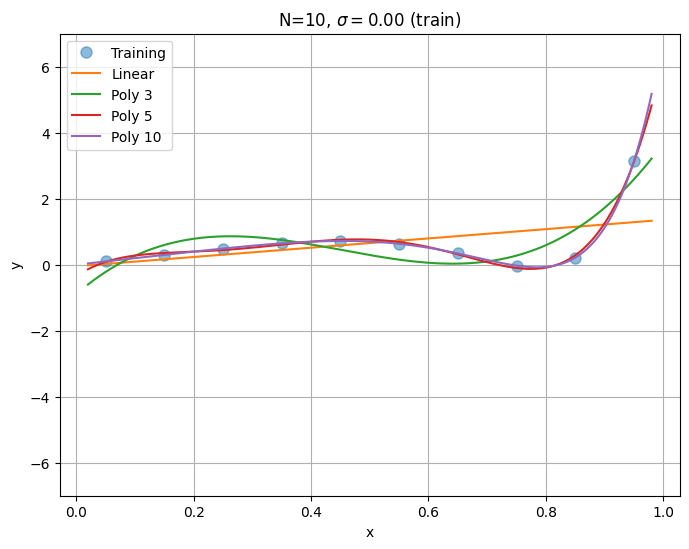

In [62]:
# Part a

%matplotlib inline

fig = plt.figure(figsize=(8, 6))

N_train=10
sigma_train=0;

x=np.linspace(0.05,0.95,N_train)
s=sigma_train*np.random.randn(N_train)

y=2*x-10*x**5+15*x**10+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

clf = linear_model.LinearRegression()

clf.fit(x[:, np.newaxis], y)

xplot=np.linspace(0.02,0.98,200)
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)

Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

poly5 = PolynomialFeatures(degree=5)
X = poly5.fit_transform(x[:,np.newaxis])
clf5 = linear_model.LinearRegression()
clf5.fit(X,y)

Xplot=poly5.fit_transform(xplot[:,np.newaxis])
plt.plot(xplot, clf5.predict(Xplot), label='Poly 5')

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")

filename_train_1="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)
filename_train_2="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)


plt.savefig(filename_train_1)
plt.savefig(filename_train_2)
plt.grid()
plt.show()

In [63]:
%matplotlib inline

N_test=10
sigma_test=sigma_train

max_x=1.2
x_test = max_x*np.random.random(N_test)

s_test = sigma_test*np.random.randn(N_test)

y_test=2*x_test-10*x_test**5+15*x_test**10+s_test

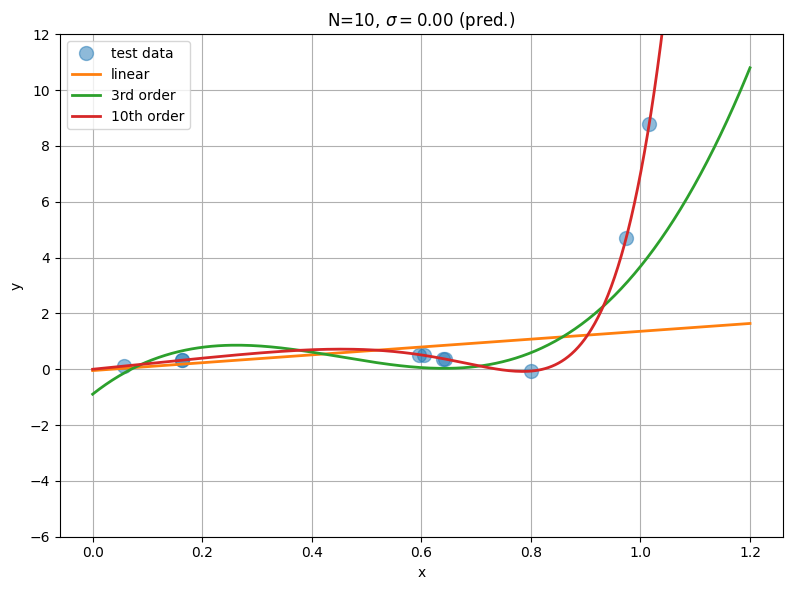

In [64]:

x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))

filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

filename_test_10=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

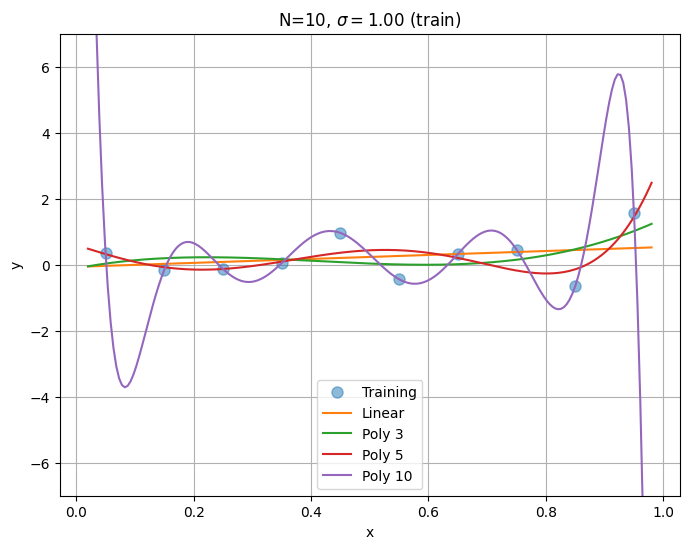

In [65]:
# Part a

%matplotlib inline

fig = plt.figure(figsize=(8, 6))

N_train=10
sigma_train=1;

x=np.linspace(0.05,0.95,N_train)
s=sigma_train*np.random.randn(N_train)

y=2*x-10*x**5+15*x**10+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

clf = linear_model.LinearRegression()

clf.fit(x[:, np.newaxis], y)

xplot=np.linspace(0.02,0.98,200)
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)

Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

poly5 = PolynomialFeatures(degree=5)
X = poly5.fit_transform(x[:,np.newaxis])
clf5 = linear_model.LinearRegression()
clf5.fit(X,y)

Xplot=poly5.fit_transform(xplot[:,np.newaxis])
plt.plot(xplot, clf5.predict(Xplot), label='Poly 5')

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")

filename_train_1="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)
filename_train_2="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)


plt.savefig(filename_train_1)
plt.savefig(filename_train_2)
plt.grid()
plt.show()

In [66]:
%matplotlib inline

N_test=10
sigma_test=sigma_train

max_x=1.2
x_test = max_x*np.random.random(N_test)

s_test = sigma_test*np.random.randn(N_test)

y_test=2*x_test-10*x_test**5+15*x_test**10+s_test

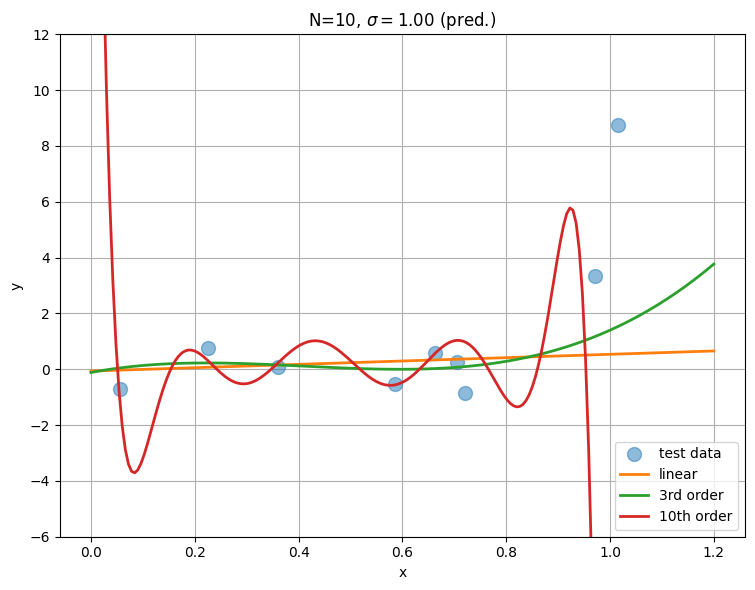

In [67]:

x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))

filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

filename_test_10=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

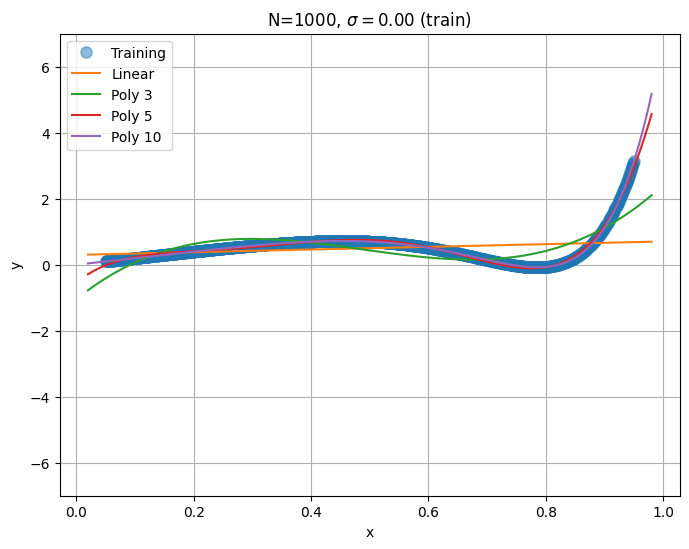

In [68]:
# Part a

%matplotlib inline

fig = plt.figure(figsize=(8, 6))

N_train=1000
sigma_train=0;

x=np.linspace(0.05,0.95,N_train)
s=sigma_train*np.random.randn(N_train)

y=2*x-10*x**5+15*x**10+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

clf = linear_model.LinearRegression()

clf.fit(x[:, np.newaxis], y)

xplot=np.linspace(0.02,0.98,200)
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)

Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

poly5 = PolynomialFeatures(degree=5)
X = poly5.fit_transform(x[:,np.newaxis])
clf5 = linear_model.LinearRegression()
clf5.fit(X,y)

Xplot=poly5.fit_transform(xplot[:,np.newaxis])
plt.plot(xplot, clf5.predict(Xplot), label='Poly 5')

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")

filename_train_1="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)
filename_train_2="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)


plt.savefig(filename_train_1)
plt.savefig(filename_train_2)
plt.grid()
plt.show()

In [69]:
%matplotlib inline

N_test=1000
sigma_test=sigma_train

max_x=1.2
x_test = max_x*np.random.random(N_test)

s_test = sigma_test*np.random.randn(N_test)

y_test=2*x_test-10*x_test**5+15*x_test**10+s_test

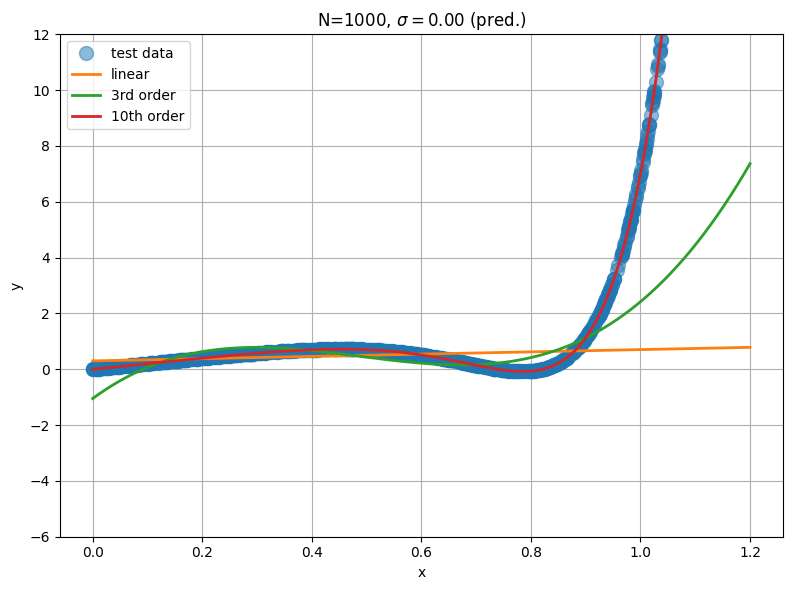

In [70]:

x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))

filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

filename_test_10=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

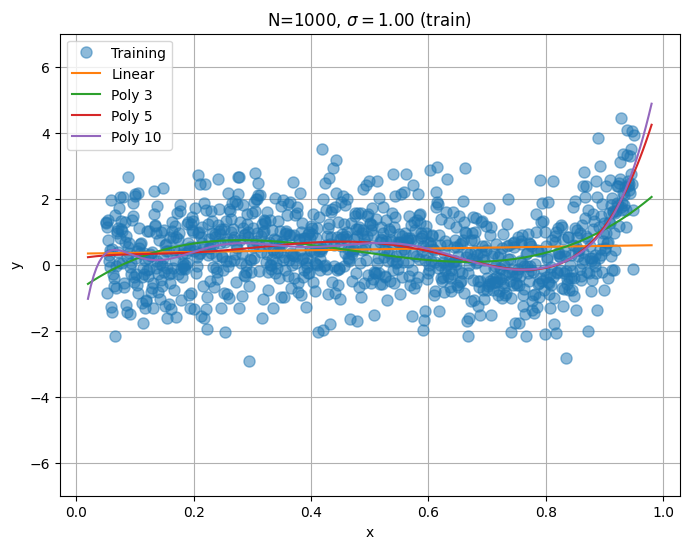

In [71]:
# Part a

%matplotlib inline

fig = plt.figure(figsize=(8, 6))

N_train=1000
sigma_train=1;

x=np.linspace(0.05,0.95,N_train)
s=sigma_train*np.random.randn(N_train)

y=2*x-10*x**5+15*x**10+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

clf = linear_model.LinearRegression()

clf.fit(x[:, np.newaxis], y)

xplot=np.linspace(0.02,0.98,200)
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)

Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

poly5 = PolynomialFeatures(degree=5)
X = poly5.fit_transform(x[:,np.newaxis])
clf5 = linear_model.LinearRegression()
clf5.fit(X,y)

Xplot=poly5.fit_transform(xplot[:,np.newaxis])
plt.plot(xplot, clf5.predict(Xplot), label='Poly 5')

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")

filename_train_1="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)
filename_train_2="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)


plt.savefig(filename_train_1)
plt.savefig(filename_train_2)
plt.grid()
plt.show()

In [72]:
%matplotlib inline

N_test=1000
sigma_test=sigma_train

max_x=1.2
x_test = max_x*np.random.random(N_test)

s_test = sigma_test*np.random.randn(N_test)

y_test=2*x_test-10*x_test**5+15*x_test**10+s_test

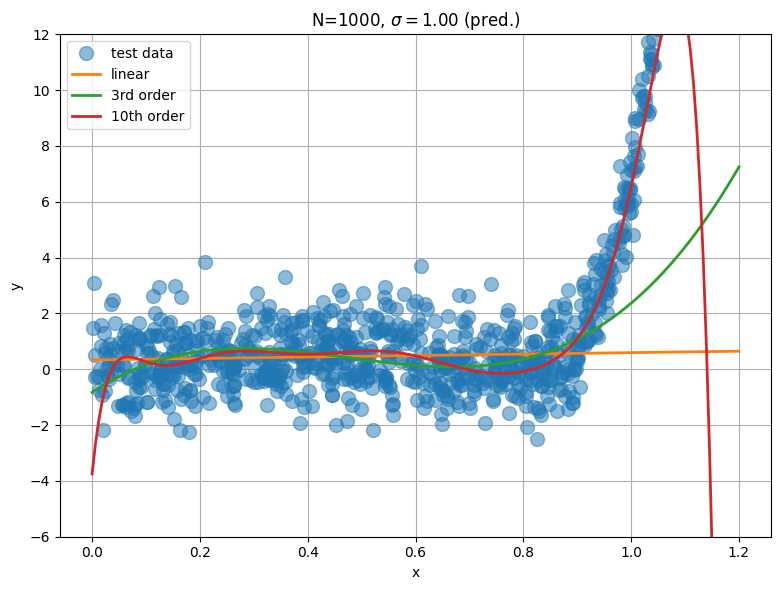

In [73]:

x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))

filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

filename_test_10=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

# Part b

# Do Better Fits Lead to Better Predictions?

No, a better fit on the training data does not always lead to better predictions. This is especially true when the training dataset is **small and noisy**.

From the findings:

- With a **small training set** ($N_{\text{train}} = 10$), the **10th-order model** fit the training points best (lowest training error) because it was flexible enough to wiggle through the noise.
  - However, it made the **worst predictions on the test data** because it had overfitted.
- The simpler **3rd-order** or even the **linear model**, despite fitting the training data more poorly, made **more stable and accurate predictions** because they didn’t "memorize" the noise.

Only when the dataset was **very large** ($N_{\text{train}} = 1000$) did the best-fitting model (the 10th-order polynomial) also become the best-predicting model.

---
# Part c

# What Is the Relationship Between the True Model, Predictive Power, and Model Complexity?

The relationship is a **balancing act** that depends entirely on the amount of data ($N_{\text{train}}$) and the level of noise ($\sigma$).

### The Goal
The model with the most predictive power is the one that best balances:

- **Capturing the true signal (low bias)**
- **Avoiding fitting the random noise (low variance)**

---

### Relationship to Complexity and Data

- **When data is scarce or noise is high:**
  - The best-predicting model is often **simpler than the true model**.
  - It is better to use a less complex model that misses part of the true pattern (accepting some bias) than a complex model that overfits the noise (suffering from high variance).
  - Example: with $N_{\text{train}} = 10$, the 3rd-order model was likely more predictive than the "correct" 10th-order model.

- **When data is abundant and noise is low:**
  - The most predictive model is the one whose complexity matches the **true data-generating function**.
  - Example: with $N_{\text{train}} = 1000$, there was enough data to properly train the 10th-order model, allowing it to learn the true curve without being distracted by noise.

---
# Part d

# Summary: Knowing the True Model vs. Predictive Power

- Simply knowing the **true model class** is **not a guarantee of predictive power**.
- This is the key lesson from **Exercise 2**:
  - Even if the data is generated by a **10th-order polynomial**, choosing a 10th-order model is the **wrong choice if there isn’t enough data** to support it.
- The **amount and quality of data** (noise level) are just as important as the model itself.
- A **simpler, “incorrect” model** can be far more powerful for predictions than a **complex, “correct” model** if the dataset is small or noisy.

**In practice:** Since we rarely know the true function in the real world, the most important skill is choosing a model that is **appropriate for the data you actually have, not the data you wish you had**.


# Exercise 3

In [74]:
# Part a & b

fig = plt.figure(figsize=(8, 6))

N_train=1000
sigma_train=1;

x=np.linspace(0.05,0.95,N_train)
s=sigma_train*np.random.randn(N_train)

y=2*x-10*x**5+15*x**10+s

<Figure size 800x600 with 0 Axes>

In [75]:
N_test=1000
sigma_test=sigma_train

max_x=1.2
x_test = max_x*np.random.random(N_test)

s_test = sigma_test*np.random.randn(N_test)

y_test=2*x_test-10*x_test**5+15*x_test**10+s_test

In [76]:
y_pred_linear_test = clf.predict(x_test[:, np.newaxis])
y_pred_poly3_test = clf3.predict(poly3.transform(x_test[:, np.newaxis]))
y_pred_poly10_test = clf10.predict(poly10.transform(x_test[:, np.newaxis]))

In [77]:
# Calculation of loss function

mse_linear_manual = np.mean((y_test - y_pred_linear_test)**2)
print(f"Cost function (MSE) for the Linear Model (Manual): {mse_linear_manual:.4f}")

mse_poly3_manual = np.mean((y_test - y_pred_poly3_test)**2)
print(f"Cost function (MSE) for the 3rd-Degree Model (Manual): {mse_poly3_manual:.4f}\n")


Cost function (MSE) for the Linear Model (Manual): 212.4185
Cost function (MSE) for the 3rd-Degree Model (Manual): 166.0490



# Exercise 4

Gradient Descent
Iteration 100000: Cost (MSE) = 1.1051
Iteration 200000: Cost (MSE) = 1.1013
Iteration 300000: Cost (MSE) = 1.1009
Iteration 400000: Cost (MSE) = 1.1008
Iteration 500000: Cost (MSE) = 1.1008
Iteration 600000: Cost (MSE) = 1.1008
Iteration 700000: Cost (MSE) = 1.1008
Iteration 800000: Cost (MSE) = 1.1008
Iteration 900000: Cost (MSE) = 1.1008
Iteration 1000000: Cost (MSE) = 1.1008
Finished

Final learned parameters (theta):
theta_0 (intercept): 0.6129
theta_1 (for x):      -5.8726
theta_2 (for x^2):    20.9531
theta_3 (for x^3):    -15.1156

Final Model Equation:
y_pred = 0.61 + -5.87x + 20.95x^2 + -15.12x^3


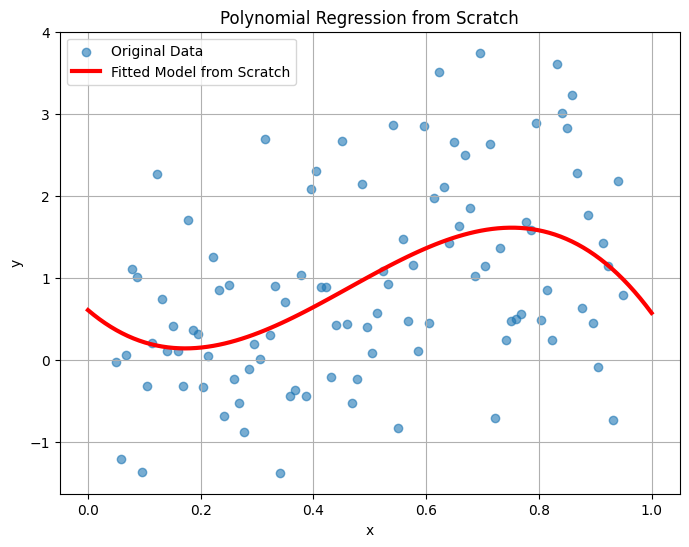

In [78]:
N = 100
x = np.linspace(0.05, 0.95, N)
s = 1 * np.random.randn(N)
y = 2 * x + s

X_new = np.c_[np.ones(N), x, x**2, x**3]

learning_rate = 0.1
n_iterations = 1000000

theta = np.zeros(4)


# I AM USING GRADIENT DESCENT
print("Gradient Descent")
for i in range(n_iterations):

    predictions = X_new.dot(theta)

    error = predictions - y
    gradient = (2/N) * X_new.T.dot(error)

    theta = theta - learning_rate * gradient

    if (i + 1) % 100000 == 0:
        cost = np.mean(error**2)
        print(f"Iteration {i+1}: Cost (MSE) = {cost:.4f}")

print("Finished")

print(f"\nFinal learned parameters (theta):")
print(f"theta_0 (intercept): {theta[0]:.4f}")
print(f"theta_1 (for x):      {theta[1]:.4f}")
print(f"theta_2 (for x^2):    {theta[2]:.4f}")
print(f"theta_3 (for x^3):    {theta[3]:.4f}")

print("\nFinal Model Equation:")
print(f"y_pred = {theta[0]:.2f} + {theta[1]:.2f}x + {theta[2]:.2f}x^2 + {theta[3]:.2f}x^3")

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, label='Original Data')
x_plot = np.linspace(0, 1, 100)
X_plot_new = np.c_[np.ones(100), x_plot, x_plot**2, x_plot**3]
y_plot = X_plot_new.dot(theta)
plt.plot(x_plot, y_plot, color='red', lw=3, label='Fitted Model from Scratch')
plt.title('Polynomial Regression from Scratch')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()